# 0.0. Import Libraries

In [18]:
# install.packages("readxl")
# install.packages("exactRankTests")
library(readxl)
library(exactRankTests)
library(psych)

# 1.0. Load Dataset

We have the following datasets to work with:
1. prosoc: proposer's info (participant's religion, age, gender, DUREL answer, ultimatum game results)
 - variables:
     - idprop: proposer's id
     - role: proposer or responder
     - idresp: proposer's corresponding responder
     - propoffer: proposal offer
     - accepted: dummy (1 = accepted)
     - female: dummy (1 = female)
     - age
     - buddhist: dummy (1 = buddhist)
     - otherrelig: dummy (1 = follows other religion)
     - freq = measuring ORA dimension
     - private = measuring NORA dimension
     - presence = measuring IR dimension
     - beliefs = meansuring IR dimension
     - carryon = measuring IR dimension
2. crontesall: DUREL questionnaire data (dimensions only)
    - variables:
        - ora = freq
        - nora = private
        - IR1 = presence
        - ir2 = beliefs
        - ir3 = carryon

In [51]:
prosoc = read_excel("datasets/prosoc.xlsx")
prosoc

idprop,role,idresp,propoffer,accepted,female,age,buddhist,otherrelig,freq,private,presence,beliefs,carryon,totscore
11,Proposer,60,2,1,1,21,1,0,5,4,4,4,1,18
12,Proposer,71,7,1,1,23,1,0,6,6,5,5,1,23
13,Proposer,82,10,1,0,20,1,0,5,5,1,4,1,16
14,Proposer,93,8,1,1,25,1,0,5,5,4,5,1,20
15,Proposer,65,4,1,1,24,1,0,6,6,5,5,1,23
16,Proposer,76,0,1,0,20,1,0,3,2,1,1,1,8
21,Proposer,70,5,1,1,22,1,0,3,6,4,5,5,23
22,Proposer,81,5,1,0,19,1,0,5,3,5,2,5,20
23,Proposer,92,5,1,1,23,1,0,3,2,3,2,5,15
24,Proposer,64,4,1,1,25,1,0,4,4,5,5,5,23


In [107]:
crontestall = read_excel("datasets/crontestall.xlsx") 
crontestall

ERROR: Error: `path` does not exist: 'datasets/crontestall.xlsx'


# 2.0. Descriptive Statistics

In [56]:
# descriptive statistics - prosoc
summary(prosoc)

     idprop          role               idresp        propoffer     
 Min.   :11.00   Length:24          Min.   :60.00   Min.   : 0.000  
 1st Qu.:19.75   Class :character   1st Qu.:69.00   1st Qu.: 2.000  
 Median :28.50   Mode  :character   Median :78.00   Median : 4.500  
 Mean   :30.33                      Mean   :77.46   Mean   : 4.375  
 3rd Qu.:41.75                      3rd Qu.:85.25   3rd Qu.: 5.500  
 Max.   :55.00                      Max.   :95.00   Max.   :10.000  
    accepted          female            age           buddhist   otherrelig
 Min.   :0.0000   Min.   :0.0000   Min.   :19.00   Min.   :1   Min.   :0   
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:20.75   1st Qu.:1   1st Qu.:0   
 Median :1.0000   Median :1.0000   Median :23.00   Median :1   Median :0   
 Mean   :0.8333   Mean   :0.6667   Mean   :23.04   Mean   :1   Mean   :0   
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:24.25   3rd Qu.:1   3rd Qu.:0   
 Max.   :1.0000   Max.   :1.0000   Max.   :30.00   Max.   :1 

In [21]:
# descriptive statistics crontestall (DUREL)
summary(crontestall)

      ora             nora            IR1             ir2             ir3     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.0  
 1st Qu.:3.750   1st Qu.:3.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.0  
 Median :4.000   Median :5.000   Median :4.000   Median :4.000   Median :4.0  
 Mean   :4.167   Mean   :4.271   Mean   :3.417   Mean   :3.479   Mean   :3.5  
 3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.:4.0  
 Max.   :6.000   Max.   :6.000   Max.   :5.000   Max.   :5.000   Max.   :5.0  

In [35]:
sd_ora = sd(crontestall$ora)
sd_nora = sd(crontestall$nora)
sd_ir1 = sd(crontestall$IR1)
sd_ir2 = sd(crontestall$ir2)
sd_ir3 = sd(crontestall$ir3)

In [41]:
cat("Standard Deviation ORA: ", sd_ora, sep="\n")
cat("Standard Deviation NORA: ", sd_nora, sep="\n")
cat("Standard Deviation IR1: ", sd_ir1, sep="\n")
cat("Standard Deviation IR2: ", sd_ir2, sep="\n")
cat("Standard Deviation IR3: ", sd_ir3, sep="\n")

Standard Deviation ORA: 
1.190983
Standard Deviation NORA: 
1.580999
Standard Deviation IR1: 
1.470755
Standard Deviation IR2: 
1.304486
Standard Deviation IR3: 
1.336875


# 3.0. Calculating Cronbach Alpha-test for Likert questions (test internal reliability)

In [20]:
# calculating raw_alpha on crontestall
alpha(crontestall)


Reliability analysis   
Call: alpha(x = crontestall)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.68      0.69    0.72      0.31 2.2 0.071  3.8 0.92     0.24

 lower alpha upper     95% confidence boundaries
0.55 0.68 0.82 

 Reliability if an item is dropped:
     raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
ora       0.57      0.57    0.58      0.25 1.3    0.101 0.052  0.22
nora      0.54      0.55    0.52      0.24 1.2    0.109 0.026  0.23
IR1       0.71      0.71    0.72      0.38 2.5    0.068 0.060  0.33
ir2       0.55      0.56    0.58      0.24 1.3    0.105 0.059  0.22
ir3       0.75      0.75    0.75      0.43 3.1    0.060 0.038  0.40

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
ora  48  0.77  0.78  0.75   0.62  4.2 1.2
nora 48  0.81  0.80  0.81   0.62  4.3 1.6
IR1  48  0.55  0.54  0.33   0.27  3.4 1.5
ir2  48  0.79  0.79  0.74   0.63  3.5 1.3
ir3  48  0.43  0.45  0.21   0.15  3.5 1.3

Non missing response freq

In [60]:
# calculating raw_alpha without ir3
alpha(crontest) # crontest is crontestall with ir3 column removed


Reliability analysis   
Call: alpha(x = crontest)

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean  sd median_r
      0.75      0.75    0.75      0.43 3.1 0.06  3.8 1.1      0.4

 lower alpha upper     95% confidence boundaries
0.63 0.75 0.86 

 Reliability if an item is dropped:
     raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
ora       0.66      0.67    0.62      0.40 2.0    0.087 0.044  0.34
nora      0.61      0.62    0.53      0.35 1.6    0.099 0.010  0.34
ir1       0.81      0.81    0.77      0.59 4.4    0.044 0.015  0.64
ir2       0.64      0.66    0.63      0.39 1.9    0.091 0.066  0.25

 Item statistics 
      n raw.r std.r r.cor r.drop mean  sd
ora  48  0.77  0.79  0.72   0.61  4.2 1.2
nora 48  0.85  0.84  0.83   0.67  4.3 1.6
ir1  48  0.61  0.60  0.36   0.32  3.4 1.5
ir2  48  0.80  0.80  0.71   0.63  3.5 1.3

Non missing response frequency for each item
        1    2    3    4    5    6 miss
ora  0.04 0.02 0.19 0.35 0.27 0.12    0
nora 0.08 0.10 0.

# 4.0 Modeling

In [66]:
## creating dummies for religion and gender
female = as.numeric(prosoc$female==1)
buddhist = as.numeric(prosoc$buddhist==1)
otherrelig = as.numeric(prosoc$otherrelig==1)

In [67]:
# fitting regression line for model I:
reg1 = lm(propoffer ~ female + age + totscore, data=prosoc)
print(summary(reg1))
coef(reg1)


Call:
lm(formula = propoffer ~ female + age + totscore, data = prosoc)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3730 -1.3998 -0.3237  1.3248  5.2494 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  12.5196     4.0546   3.088  0.00580 **
female        0.6453     1.2226   0.528  0.60343   
age          -0.6321     0.1911  -3.307  0.00352 **
totscore      0.3046     0.1531   1.990  0.06047 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.542 on 20 degrees of freedom
Multiple R-squared:  0.3777,	Adjusted R-squared:  0.2844 
F-statistic: 4.046 on 3 and 20 DF,  p-value: 0.0212



(Intercept)      female         age    totscore 
 12.5195514   0.6453172  -0.6321477   0.3046258

In [68]:
# fitting regression line for model II:

reg2 = lm(propoffer ~ female + age + freq + private + presence + 
            beliefs
          , data=prosoc)

print(summary(reg2))
coef(reg2)


Call:
lm(formula = propoffer ~ female + age + freq + private + presence + 
    beliefs, data = prosoc)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0160 -1.1840 -0.2343  1.1599  4.3773 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 13.27958    4.23729   3.134  0.00605 **
female       1.01089    1.22688   0.824  0.42138   
age         -0.68267    0.20914  -3.264  0.00457 **
freq         0.49437    0.70077   0.705  0.49008   
private      0.63636    0.54160   1.175  0.25620   
presence     0.23380    0.44263   0.528  0.60419   
beliefs      0.02727    0.55803   0.049  0.96160   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.568 on 17 degrees of freedom
Multiple R-squared:  0.4602,	Adjusted R-squared:  0.2697 
F-statistic: 2.416 on 6 and 17 DF,  p-value: 0.0713



(Intercept)      female         age        freq     private    presence 
13.27958368  1.01089317 -0.68266916  0.49437028  0.63636374  0.23379556 
    beliefs 
 0.02726859

# 5.0 Wilcoxon Signed Rank Test
Since the sample size is small (N= 24), we performed a non-parametric test between religious and non-religious participants. From the prosoc dataset, we derived the relig dataset (religious participants) and the nonrelig dataset (non-religious participants) to perform the test.

In [75]:
relig = read_excel("datasets/relig.xlsx")
nonrelig = read_excel("datasets/nonrelig.xlsx")
relig

idprop,role,idresp,propoffer,earnings,respearn,accepted,female,age,buddhist,otherrelig,freq,private,presence,beliefs,carryon,totscore
11,Proposer,60,2,8,2,1,1,21,1,0,5,4,4,4,1,18
25,Proposer,75,4,0,0,0,1,24,1,0,3,5,1,4,5,18
51,Proposer,61,8,2,8,1,0,22,1,0,5,5,4,3,2,19
14,Proposer,93,8,2,8,1,1,25,1,0,5,5,4,5,1,20
22,Proposer,81,5,5,5,1,0,19,1,0,5,3,5,2,5,20
41,Proposer,90,5,5,5,1,0,22,1,0,5,5,4,4,2,20
44,Proposer,84,1,0,0,0,1,27,1,0,6,6,2,4,2,20
52,Proposer,72,0,0,0,0,0,29,1,0,5,6,3,4,2,20
55,Proposer,66,10,0,10,1,1,20,1,0,6,6,5,1,2,20
12,Proposer,71,7,3,7,1,1,23,1,0,6,6,5,5,1,23


In [74]:
wilcox.exact(relig$propoffer,nonrelig$propoffer)


	Exact Wilcoxon rank sum test

data:  relig$propoffer and nonrelig$propoffer
W = 73.5, p-value = 0.3896
alternative hypothesis: true mu is not equal to 0


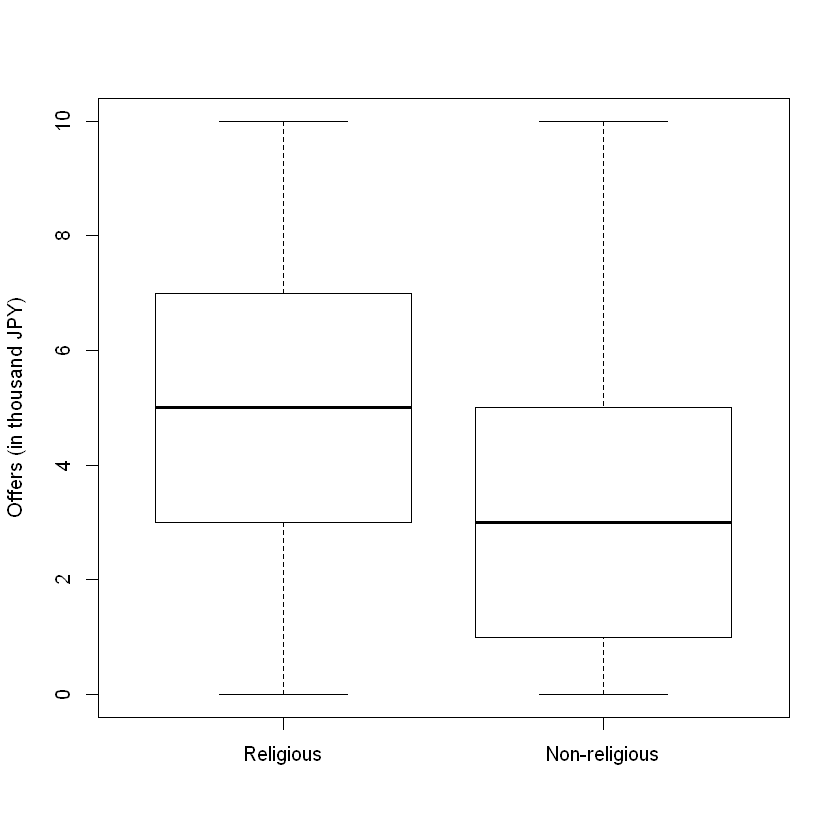

In [76]:
boxplot(relig$propoffer, nonrelig$propoffer, main = "", ylab = "Offers (in thousand JPY)", 
        ylim = c(0,10), names = c("Religious","Non-religious"))

In [106]:
summary(relig)
sd_mean_relig = sd(relig$propoffer)
sd_mean_earnings__prop_relig = sd(relig$earnings)
sd_mean_earnings__resp_relig = sd(relig$respearn)
rejectrate_relig = sum(relig$accepted == 0)/length(relig$accepted)
fairrate_relig = sum(relig$propoffer >=5)/length(relig$propoffer)

cat("Standard Deviation Religious Proposer Offers: ", sd_mean_relig, sep="\n")
cat("Standard Deviation Religious Earnings of Proposers: ", sd_mean_earnings__prop_relig, sep="\n")
cat("Standard Deviation Religious Earnings of Responders: ", sd_mean_earnings__resp_relig, sep="\n")
cat("Rejection Rate - Religious Treatment", rejectrate_relig, sep="\n")
cat("Fair & Charity Offer Rate (5-10 thousand JPY)", fairrate_relig, sep="\n")

summary(nonrelig)
sd_mean_nonrelig = sd(nonrelig$propoffer)
sd_mean_earnings__prop_nonrelig = sd(nonrelig$earnings)
sd_mean_earnings__resp_nonrelig = sd(nonrelig$respearn)
rejectrate_nonrelig = sum(nonrelig$accepted == 0)/length(nonrelig$accepted)
fairrate_nonrelig = sum(nonrelig$propoffer >=5)/length(nonrelig$propoffer)
cat("Standard Deviation Non-Religious Proposer Offers: ", sd_mean_nonrelig, sep="\n")
cat("Standard Deviation Non-Religious Earnings of Proposers: ", sd_mean_earnings__prop_nonrelig, sep="\n")
cat("Standard Deviation Non-Religious Earnings of Responders: ", sd_mean_earnings__resp_nonrelig, sep="\n")
cat("Rejection Rate - Non-Religious Treatment", rejectrate_nonrelig, sep="\n")
cat("Fair & Charity Offer Rate (5-10 thousand JPY)", fairrate_nonrelig, sep="\n")

     idprop       role               idresp        propoffer     
 Min.   :11   Length:17          Min.   :60.00   Min.   : 0.000  
 1st Qu.:21   Class :character   1st Qu.:66.00   1st Qu.: 3.000  
 Median :26   Mode  :character   Median :74.00   Median : 5.000  
 Mean   :30                      Mean   :75.47   Mean   : 4.706  
 3rd Qu.:41                      3rd Qu.:84.00   3rd Qu.: 7.000  
 Max.   :55                      Max.   :93.00   Max.   :10.000  
    earnings        respearn         accepted          female      
 Min.   :0.000   Min.   : 0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.: 2.000   1st Qu.:1.0000   1st Qu.:1.0000  
 Median :5.000   Median : 5.000   Median :1.0000   Median :1.0000  
 Mean   :3.824   Mean   : 4.412   Mean   :0.8235   Mean   :0.7647  
 3rd Qu.:6.000   3rd Qu.: 7.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :9.000   Max.   :10.000   Max.   :1.0000   Max.   :1.0000  
      age           buddhist   otherrelig      freq      priva

Standard Deviation Religious Proposer Offers: 
2.823223
Standard Deviation Religious Earnings of Proposers: 
2.941838
Standard Deviation Religious Earnings of Responders: 
3.123676
Rejection Rate - Religious Treatment
0.1764706
Fair & Charity Offer Rate (5-10 thousand JPY)
0.5294118


     idprop          role               idresp        propoffer     
 Min.   :13.00   Length:7           Min.   :63.00   Min.   : 0.000  
 1st Qu.:19.50   Class :character   1st Qu.:79.00   1st Qu.: 1.000  
 Median :33.00   Mode  :character   Median :83.00   Median : 3.000  
 Mean   :31.14                      Mean   :82.29   Mean   : 3.571  
 3rd Qu.:40.00                      3rd Qu.:88.50   3rd Qu.: 5.000  
 Max.   :53.00                      Max.   :95.00   Max.   :10.000  
    earnings         respearn         accepted          female      
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 2.500   1st Qu.: 0.000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median : 7.000   Median : 2.000   Median :1.0000   Median :0.0000  
 Mean   : 5.714   Mean   : 2.857   Mean   :0.8571   Mean   :0.4286  
 3rd Qu.: 9.000   3rd Qu.: 4.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :10.000   Max.   :10.000   Max.   :1.0000   Max.   :1.0000  
      age           buddhist   oth

Standard Deviation Non-Religious Proposer Offers: 
3.505098
Standard Deviation Non-Religious Earnings of Proposers: 
4.270608
Standard Deviation Non-Religious Earnings of Responders: 
3.670993
Rejection Rate - Non-Religious Treatment
0.1428571
Fair & Charity Offer Rate (5-10 thousand JPY)
0.4285714
